# 图像控制

在介绍统计图像等绘图命令之前，本节先介绍图像控制的命令，包括：

- 用 `rcParams` 来设置默认参数
- 子图的调整命令
- 标题
- 图例
- 坐标轴控制
  - 坐标轴的取值区间、刻度
  - 坐标轴的总标签、刻度标签
  - 坐标轴网格线
- 双纵轴
- 文字命令
- 其他坐标系的绘制
  - 对数坐标系
  - 左手系
  - 极坐标

关于线型与颜色的控制，请参考上一章节的内容。

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## 默认参数：mpl.rcParams

当使用 matplotlib 绘制多条曲线时，即使你没有指定每条曲线的颜色，matplotlib 也会自动用不同的颜色加以区分。这是因为 `matplotlib.rcParams` 这个字典变量的缺省值设置。我们在上一章已经介绍过，`'C0'`~`'C9'` 是 matplotlib 缺省的绘制颜色，我们可以查看当前的绘制颜色：

In [2]:
import matplotlib as mpl
mpl.rcParams["lines.color"]

'C0'

如果要更改默认参数的值，可以使用 `mpl.rc()` 命令（并可用 `mpl.rcdefaults()` 来重置）。但更多的情况下，我们只想在接下来的图像中变更默认值；这时请使用 `plt.rc()` 命令。下面是一个更改颜色循环的例子，借助了 `cycler` 库：

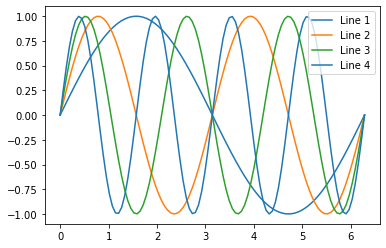

In [3]:
from cycler import cycler

n = 4
x = np.linspace(0, 2*np.pi, 100)
k = np.arange(n) + 1
Y = np.sin(np.outer(k, x))

color_cycle = cycler('color', ['tab:blue', 'tab:orange', 'tab:green'])
plt.rc("axes", prop_cycle=color_cycle)
for row in range(n):
    plt.plot(x, Y[row], label=f"Line {row+1}")
plt.legend()
plt.show()

上例绘制了 4 条曲线，不过用 `plt.rc` 设定色环时只设定了 3 种，因此 Line 4 与 Line 1 采用了相同的颜色。如果要在接下来的章节中重置为到初始的配置，可以执行 `plt.rcdefaults()` 命令。

除了颜色，`rcParams` 还控制着众多的其他参数，就不在此赘述了。读者可以参考 [Matplotlib API (v3.1.1) - matplotlib.rc](https://matplotlib.org/3.1.1/api/matplotlib_configuration_api.html#matplotlib.rc) 页面。

## 通用的绘图流程：plt.subplots

在上一章中我们已经介绍了绘图的方法。通常有两种：

1. 直接使用 `plt.plot()` 绘制。
2. 先声明 `f, ax = plt.subplots()` ，然后绘制。

出于保存图像以及复用性的考虑，我**推荐使用 subplots 方式**。下面的内容也基本会以这种绘制为主。

除了上一章介绍的调用方式： `plt.subplots(nrows, ncols, [sharex/sharey=False])`，这里再介绍几个会用的参数：

- `figsize`：总图的宽与高。例如 `figsize=(12,6)` 表示宽 12 高 6，单位英寸。也可以传入 `plt.figaspect(x)` 来设置高宽比为 x。
- `subplot_kw`：这是一个传递参数，并不经常使用。在此提及是因为在绘制极坐标图像时会用到：`subplot_kw=dict(projection='polar')`。
- `gridspec_kw`：一个控制各列高度之比或各行宽度之比的参数。例如 `gridspec_kw={'height_ratios':[1, 2]}` 表示第二行子图的高度将是第一行子图的两倍。

### 子图的间距调整

对 `f, ax = plt.subplots()`，我们可以使用 `f.subplots_adjust` 来调整子图间距：

- `left/right/bottom/top=0.125/0.9/0.1/0.9`：默认的四侧边距。
- `wspace=0.2`：列间距，单位是平均子图宽度的倍数。
- `hspace=0.2`：行间距，单位是平均子图高度的倍数。

在下文的“图例”一节的例子中，就使用了 `f.subplots_adjust(hspace=0.35)` 这样的命令来调节子图行间距。

## 图像标题：ax.set_title

图像标题使用 `ax.set_title()` 来设置（但如果直接使用 `plt.plot` 绘图，那么请用 `plt.title()` 来设置标题。建议读者始终使用 `ax` 的方式进行绘图）。该命令支持的参数：

- `loc`：标题的水平对齐方式。默认是 `'center'` 居中对齐，可用 `'left' / 'right'` 来控制。
- `y`： 控制标题与图像顶部的间距比例，比如例中的 `y=1.05`。*这个参数官方似乎没有介绍*。
- `pad`：（本参数可能不如 `y` 参数直观）标题与图像顶部的间距，默认值是 `rcParams['axes.titlepad']`。
- 其它参数可以用 `fontdict` 字典来控制，不过其键也能直接调用。可能用到的是 [`fontweight`](https://matplotlib.org/3.1.1/api/text_api.html?highlight=fontweight#matplotlib.text.Text.set_fontweight) 与 `fontsize` （单位 pt）这两个键。

来看一个 `ax.set_title()` 的例子：

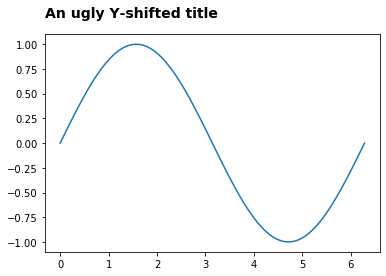

In [4]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("An ugly Y-shifted title", y=1.05, loc='left',
             fontsize=14, fontweight='heavy')
plt.show()

对于 LaTeX 用户，标题中也可以展示 LaTeX 数学字符：

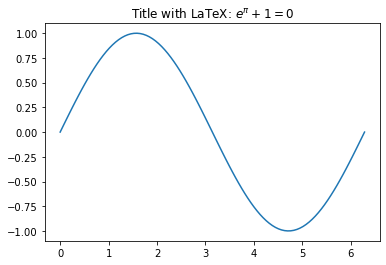

In [5]:
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("Title with LaTeX: $e^\pi + 1 = 0$")
plt.show()

## 坐标轴标题：ax.set_xlabel

函数 `ax.set_xlabel/set_ylabel` 与 `ax.set_title` 的用法类似，也可以用 `loc` 参数控制水平对齐；不过与图像的间距参数由 `labelpad` 代替了 `pad`：

- `labelpad`：与图像的间距。对 `ax.set_xlabel` 是竖直间距，对 `ax.set_ylabel` 是水平间距。
- `rotation`：坐标轴标题文字的旋转角度。如果给 Y 轴标值设置 `rotation=0`，文字会变成正立的。
- `x`：（仅对 `ax.set_xlabel` 有效）控制水平位置，0是图像最左侧，1是图像最右侧。
- `y`：（仅对 `ax.set_ylabel` 有效）控制竖直位置，0是图下最下端，1是图像最顶端。

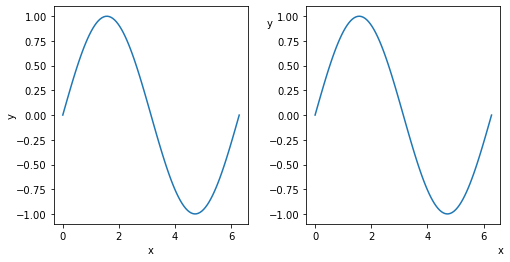

In [6]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

f, axarr = plt.subplots(1, 2, figsize=plt.figaspect(.5))
f.subplots_adjust(wspace=.3)
axarr = axarr.ravel()
for ax in axarr:
    ax.plot(x, y)

axarr[0].set_xlabel("x")
axarr[0].set_ylabel("y", labelpad=-1)

axarr[1].set_xlabel("x", x=1)
axarr[1].set_ylabel("y", y=0.9, rotation=0, labelpad=-1)

plt.show()

## 图例：ax.legend / f.legend

在 `rcParams` 的介绍中，我们其实已经展示了图例的用法，即在绘图命令中添加 `label` 参数，然后在绘制的最后使用 `ax.legend` 命令。

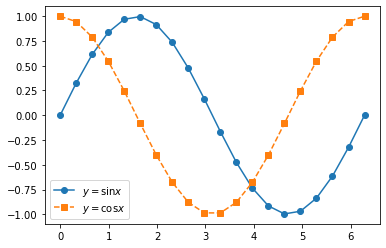

In [7]:
x = np.linspace(0, 2*np.pi, 20)
y1, y2 = np.sin(x), np.cos(x)

f, ax = plt.subplots()
ax.plot(x, y1, 'o-', label="$y=\sin{x}$")
ax.plot(x, y2, 's--', label="$y=\cos{x}$")
ax.legend()
plt.show()

图例的实用参数很多，包括：

- `ncol`：图例分为几列。以及列间距 `columnspacing=2.0`。
- `title`：图例标题。默认 None 因此不显示。可以设置标题字体 `title_fontsize`。
- 图例的位置
    - `loc`：图例可以用 `loc` 参数手动指定，默认是自动选择（即赋值为 `0` 或者 `'best'`）。指定的方式可以用数字 0-10，或者英文组合：即 `upper/lower` 与 `left/right` 以及 `center` 的方位组合，有 `'upper right'`，`'lower center'`，`'center left'` 等共9种。
    - `bbox_to_anchor`：传递一个类似 `(x_ratio, y_ratio)` 的比例值来指定图例的放置位置。负值可以将图例放置在图像外侧。
- 图例样式控制
    - `frameon`：图例是否显示边框 `True/False`。此外还可设置底色 `facecolor` 与边框色 `edgecolor`，颜色生效的前提是显示边框。
    - `numpoints`：图例中绘制几个点。
    - `markerscale`：图例中的点样式比例。
    - `markerfirst=False`：图例是否从点还是线开始绘制。
- 图例尺寸与间距控制
    - `borderpad=0.4`：内侧边距，单位是字号大小的倍数。
    - `labelspacing=0.5`：图例的项间距，单位同上。
    - `handletextpad=0.8`：图例的样式与文字间距，单位同上。以及 `handlelength=2.0` 指定样式的长度。

下面是一些例子：

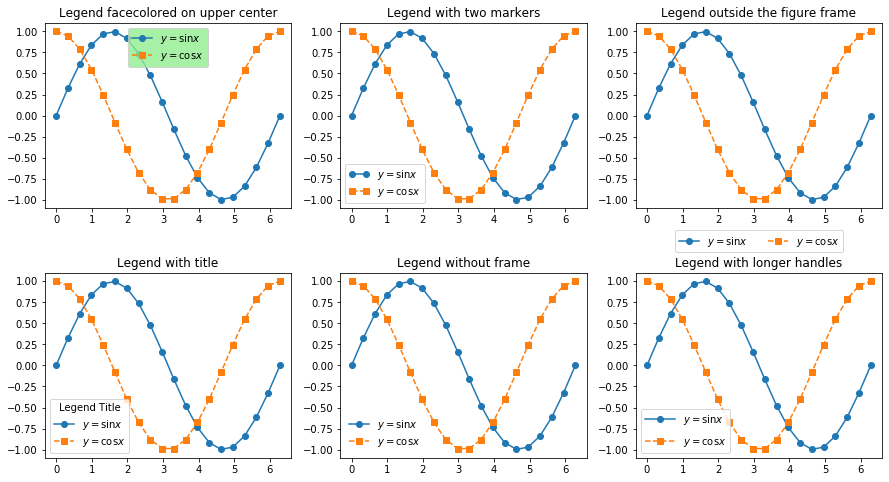

In [8]:
fig_titles = [
    "Legend facecolored on upper center", "Legend with two markers", 
    "Legend outside the figure frame", "Legend with title",
    "Legend without frame", "Legend with longer handles"
]

f, axarr = plt.subplots(2, 3, figsize=(15,8))
f.subplots_adjust(hspace=0.35)
axarr = axarr.ravel()
for t, ax in zip(fig_titles, axarr):
    ax.plot(x, y1, 'o-', label="$y=\sin{x}$")
    ax.plot(x, y2, 's--', label="$y=\cos{x}$")
    ax.set_title(t)

axarr[0].legend(loc="upper center", facecolor="lightgreen")
axarr[1].legend(numpoints=2)
axarr[2].legend(loc="center", ncol=2, bbox_to_anchor=(0.5, -0.18))
axarr[3].legend(title="Legend Title")
axarr[4].legend(frameon=False)
axarr[5].legend(handlelength=3, labelspacing=1)

plt.show()

最后，需要指出 `f.legend` 这个命令也是存在的，它能够画出当前 Figure 对象中所有带 label 的 Axes 对象的图例。我在日常使用中很少使用它，但我认为它的主要价值在于**能够轻松处理双纵轴图像的图例**。下例命令会将图例放置在顶部中央的外侧：

```python
f.legend(loc='upper center')
```

但是，如果要将它的图例放置在图像内侧，需要配合另外两个参数。其中，`bbox_to_anchor` 的值要根据放置的位置变动，而 `bbox_transform = ax.transAxes` 无须变动。比如，要将图例放置在内侧的顶部中央：

```python
f.legend(loc='upper center', bbox_to_anchor=(0.5,1), bbox_transform=ax.transAxes)
```

关于 `f.legend` 的例子，读者可以参考下文中双纵轴绘图一节的内容。

## 坐标轴区间：ax.axis / set_xlim

设置坐标轴区间有两种命令：

1. 通过 `ax.axis` 同时控制两个轴，也可以配合 `xmax/xmin/ymax/ymin` 参数控制每个轴的单侧。
2. 通过 `ax.set_xlim/set_ylim` 来控制一个轴的两侧。

这两种方式都非常直截，例子如下：

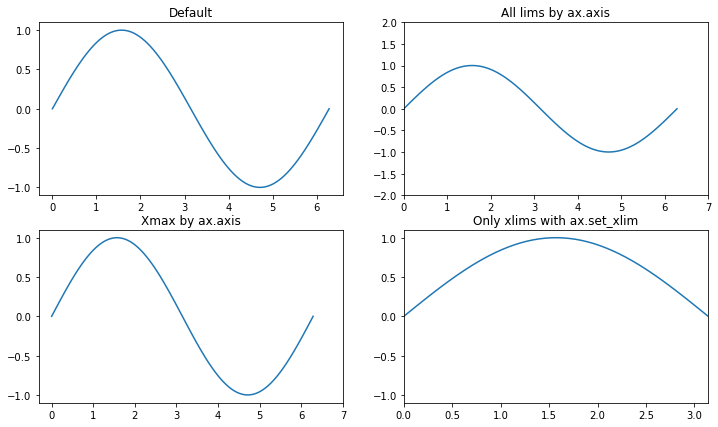

In [9]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

fig_titles = [
    "Default", "All lims by ax.axis",
    "Xmax by ax.axis", "Only xlims with ax.set_xlim"
]

f, axarr = plt.subplots(2, 2, figsize=(12,7))
axarr = axarr.ravel()
for t, ax in zip(fig_titles, axarr):
    ax.plot(x, y)
    ax.set_title(t)

# axarr[0]: Default
axarr[1].axis([0, 7, -2, 2])
axarr[2].axis(xmax=np.ceil(x.max()))
axarr[3].set_xlim([0, np.pi])

plt.show()

## 坐标轴刻度

坐标轴的刻度控制分为两个方面：

- 一个是**坐标轴的刻度值**
- 另一个是**坐标轴的刻度标签**。一般情形下，刻度标签都是与刻度值保持一致。

如无特殊说明，文中的刻度值指主刻度值。

### 坐标轴刻度值：ax.xaxis.set_major_locator / ax.set_xticks

最常用的方法应该是通过 `ax.xaxis.set_major_locator` 控制主刻度值的位置，也就是我们常说的最小刻度值。我们经常需要加载两个函数：

- `MultipleLocator(x)`：帮助在 x 的整数倍处设置刻度
- `FormatStrFormatter(formatstr)`：以 formatstr 的形式设置刻度标签的格式

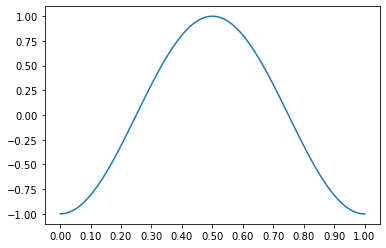

In [10]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

x = np.linspace(0, 1, 100)
y = -np.cos(2 * np.pi * x)

f, ax = plt.subplots()
ax.plot(x, y)
# 仅在 0.1 的整数倍处设置刻度，并将刻度标签保留2位小数
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
plt.show()

另一种方法是直接用 `ax.set_xticks` （或者等效的 `ax.xaxis.set_ticks`）来直接传递各个刻度处的值，请参考下面的刻度标签一节。

### 坐标轴刻度标签：ax.set_xticklabels

下面是一个综合的例子，直接将给定的值设置为刻度：

- 图 1 是默认刻度，刻度数量是横 6 竖 5
- 图 2~4 将横竖刻度数量均改为 11 个，且赋了已给定的值。此外：
  - 图 3 将 X 轴刻度标签格式设置为保留 2 位小数，并截去了一半图像。这一步使用了 `ax.xaxis.set_major_formatter` 函数。
  - 图 4 将 X 轴刻度标签改变成了英文字母，且移除了所有的 Y 轴标签。

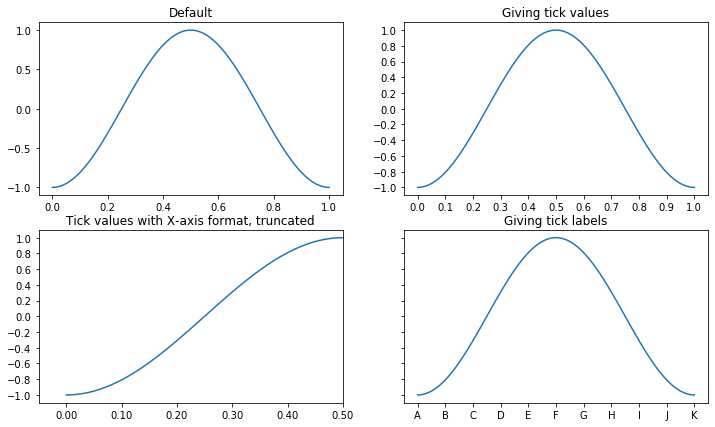

In [11]:
from matplotlib.ticker import FormatStrFormatter
import string

x = np.linspace(0, 1, 100)
y = -np.cos(2 * np.pi * x)

fig_titles = [
    "Default", "Giving tick values",
    "Tick values with X-axis format, truncated",
    "Giving tick labels"
]
xticknum, yticknum = 10, 10
xtickvalues = np.linspace(0, 1, xticknum+1)
ytickvalues = np.linspace(-1, 1, yticknum+1)

f, axarr = plt.subplots(2, 2, figsize=(12,7))
axarr = axarr.ravel()
for i in range(len(axarr)):
    ax = axarr[i]
    ax.plot(x, y)
    ax.set_title(fig_titles[i])
    if i > 0:
        ax.set_xticks(xtickvalues)
        ax.set_yticks(ytickvalues)

axarr[2].xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
axarr[2].axis(xmax=.5)

axarr[3].set_xticklabels(string.ascii_uppercase[:(xticknum+1)])
axarr[3].set_yticklabels([])
    
plt.show()

### 坐标轴次要刻度：ax.xaxis.set_minor_locator

可以使用 `AutoMinorLocator` 让 matplotlib 自行设置次要刻度，或者仿照上文的主刻度使用 `MultipleLocator` 函数。

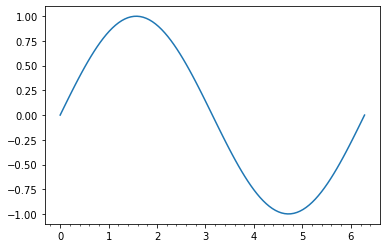

In [12]:
from matplotlib.ticker import AutoMinorLocator

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

f, ax = plt.subplots()
ax.plot(x, y)

ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.show()

### 坐标轴刻度的绘图样式：ax.tickparams

刻度的绘图样式控制使用 `ax.tickparams` 命令：

- 选取
    - `which`：用 `both` 选中所有刻度，或者用 `major` 选中主刻度，或者用 `minor` 选中次要刻度。
    - `axis`：例如用 `axis='x'` 来选择 x 轴的刻度。
- `pad`：刻度线与刻度标签的间距
- 刻度线
    - `width/length`：刻度线的宽度与长度，单位是 pt。
    - `color`：刻度线的颜色
    - `direction`：刻度线的朝向，可以设置为 `'in'`，`'out'` 或 `'both'`
    - `bottom/top/left/right`：是否在对应方向的框线上画出刻度线，`True/False`。
- 刻度标签
    - `labelcolor`：标签颜色。
    - `labelsize`：标签字号，单位 pt；或者传入表示字号的字符串，比如 `'large'`。
    - `labelrotation`：标签旋转角度。
    - `labelbottom/labeltop/...`：（类似 `bottom/top/...`）是否在对应的方向显示刻度标签，`True/False`。
- 刻度网格（网格格式也可以通过 `ax.grid` 直接控制）
    - `grid_color`：网格线颜色。
    - `grid_linewidth/grid_linestyle`：网格线的线宽/线型。
    - `grid_alpha`：网格线的透明度，0为完全透明，1为完全不透明。

借用次要刻度一节的例子：

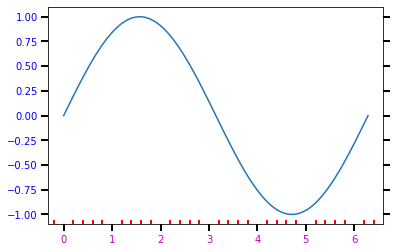

In [13]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

f, ax = plt.subplots()
ax.plot(x, y)

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7, labelcolor='blue', right=True)
ax.tick_params(which='minor', length=4, color='r', direction='in')
ax.tick_params(axis='x', labelcolor='m')

plt.show()

## 坐标轴刻度网格：ax.grid

与绘图命令类似，`linestyle(ls)`，`linewidth(lw)`，`color` 与 `alpha` 参数均可以在 `ax.grid` 中使用：

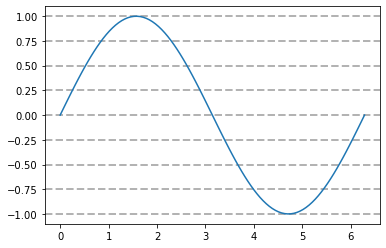

In [14]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

f, ax = plt.subplots()
ax.plot(x, y)
ax.grid(axis='y', ls='--', lw=2, color='0.7')
plt.show()

除了用 `axis='x'/'y'` 来控制，也可以用 `which='major'/'minor'/'both'` 来控制。关于这点，读者可以参考上文中 `ax.tick_params` 部分的内容。以下是一个例子：

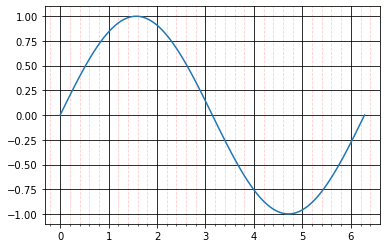

In [15]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

f, ax = plt.subplots()
ax.plot(x, y)
ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.grid(which='major', ls='-', color='k')
ax.grid(which='minor', ls='--', color='r', alpha=0.2)

plt.show()

## 坐标轴的高级控制

### 坐标轴/框的显示：ax.set_axis_off / set_frame_on 

这里展示三种方法来改变坐标轴元素的显示与隐藏：

1. `ax.set_axis_off()`：隐藏所有 axes，即 frame 与 tick 均不显示。
2. `ax.set_frame_on(False)`：仅隐藏 frame. 如果要隐藏 frame 的某几条边，参考下文中坐标轴骨架 `ax.spines` 部分的内容。
3. `ax.xaxis.set_visible(False)`：仅隐藏单个轴的 ticks.

以下是例子。坐标轴的背景颜色使用 `ax.set_facecolor` 更改。

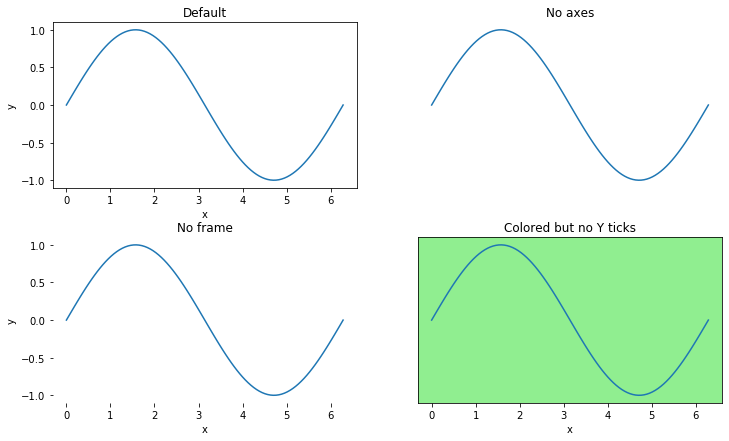

In [16]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

fig_titles = [
    "Default", "No axes",
    "No frame", "Colored but no Y ticks"
]

f, axarr = plt.subplots(2, 2, figsize=(12, 7))
f.subplots_adjust(hspace=0.3)
axarr = axarr.ravel()
for t, ax in zip(fig_titles, axarr):
    ax.plot(x, y)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(t)

# axarr[0]: Default
axarr[1].set_axis_off()
axarr[2].set_frame_on(False)
axarr[3].set_facecolor("lightgreen")
axarr[3].yaxis.set_visible(False)
plt.show()

### 坐标轴骨架：ax.spines

通过设置坐标轴框架的显隐，可以更好地绘制符合“数学审美”的图像，即画出 X 轴与 Y 轴，而不是一个外接框。

下面的例子通过 `ax.spines[...].set_visible` 来控制四面边框的显隐，并用 `ax.spines[...].set_position` 的方式移动边框的位置，以此模仿正常的坐标轴的效果：

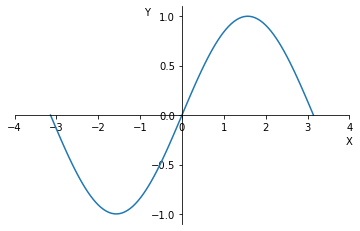

In [17]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.set_xlabel("X", x=1)
ax.set_ylabel("Y", y=0.95, rotation=0)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_xlim([-4, 4])

plt.show()

其中 `MultipleLocator` 的使用在前文已经介绍过。不过相比真正严格的绘图，上例仍显不足：

- 坐标轴没有箭头
- 刻度、坐标轴、图像之间相互重叠了

毕竟本例只是一个粗糙的例子。我会在之后寻找是否有更好的解决方案。

### 双纵轴：ax.twinx

双纵轴本质上是两个共享 x 轴图像的叠加绘制。

注意，由于双纵轴使用了两个 `Axes` 对象，所以绘制图例时，使用 `f.legend` 而不是 `ax.legend`。

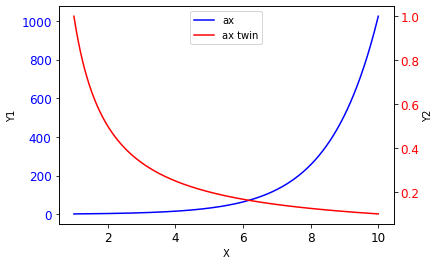

In [18]:
x = np.linspace(1, 10, 1000)
y1 = np.power(2, x)
y2 = np.power(x, -1)
label_fs = 12
ax_color, ax_twin_color = 'blue', 'red'

f, ax = plt.subplots()
ax.plot(x, y1, color=ax_color, label='ax')
ax.tick_params(axis='y', labelcolor=ax_color)
ax.tick_params(which='both', labelsize=label_fs)
ax.set_xlabel('X')
ax.set_ylabel('Y1')

ax_twin = ax.twinx()
ax_twin.plot(x, y2, color=ax_twin_color, label='ax twin')
ax_twin.tick_params(axis='y', labelcolor=ax_twin_color, labelsize=label_fs)
ax_twin.set_ylabel('Y2')

f.legend(loc='upper center', bbox_to_anchor=(0.5,1), bbox_transform=ax.transAxes)
plt.show()

类似的，也可以用 `ax.twiny` 绘制双横轴；不过我尚未遇到需要双横轴的场合。

## 添加文字：ax.text / annotate

最简单的是 `ax.text`，直接输出文字：

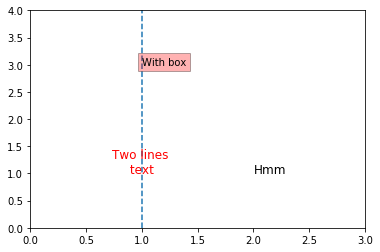

In [67]:
f, ax = plt.subplots()
ax.axvline(1, ls='--')

# 单独使用字号控制命令
ax.text(2, 1, 'Hmm', fontsize=12)  
ax.text(1, 1, 'Two lines \n text ', horizontalalignment='center', 
         fontdict={'size': 12, 'color': 'r'})

# 用 bbox 参数控制背景框
ax.text(1, 3, 'With box', bbox=dict(facecolor='r', alpha=0.3))  

ax.axis([0, 3, 0, 4])
plt.show()

其次是 `annotate`，这个参数比较复杂，细节读者可以参考文档。一些可能用到的箭头：`'-' / '->' / '-|>' / '|-|' / '<->'` 等。

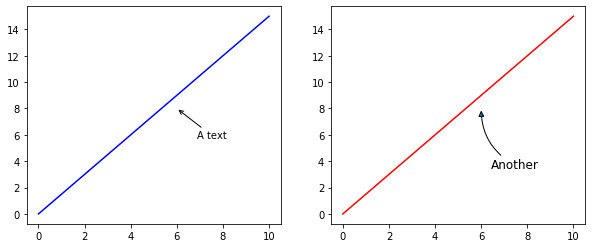

In [68]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot([0, 10], [0, 15], 'b')
ax1.annotate(r'A text', xy=(6,8), xytext=(20, -30), textcoords='offset pixels', 
             arrowprops=dict(arrowstyle='->'))

ax2.plot([0, 10], [0, 15], 'r')
ax2.annotate(r'Another', xy=(6,8), xytext=(10, -60), 
             textcoords='offset pixels', fontsize=12, 
             # 指定圆弧半径，负值表示顺时针画弧
             arrowprops=dict(arrowstyle='-|>',
                             connectionstyle='arc3, rad=-0.3'))  

plt.show()

## 其他坐标系

除了正常的、等刻度坐标系，我们可能还需要用到其他坐标系：

- 对数坐标系

另外，除了正常的右手系，我们还可能用到：

- 左手坐标系
- 极坐标系

### 对数坐标系：ax.loglog / semilogx / semilogy

本节介绍：

- `loglog`：双轴均为对数
- `semilogx/semilogy`：半对数

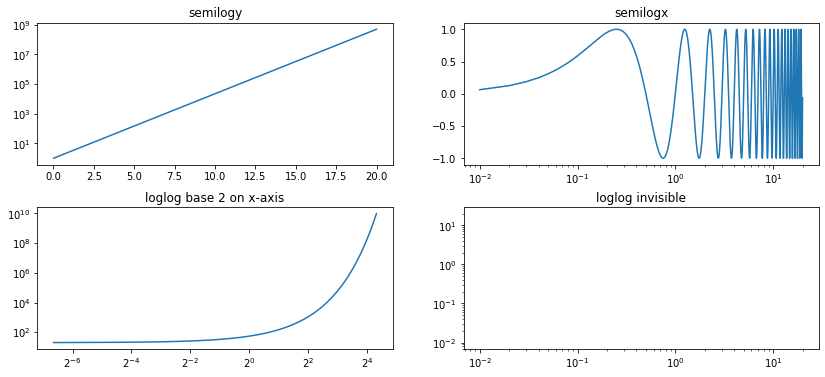

In [19]:
x = np.arange(0.01, 20, 0.01)

f, ax = plt.subplots(2, 2, figsize=(14, 6))
f.subplots_adjust(hspace=0.3)

ax[0,0].semilogy(x, np.exp(x))
ax[0,0].set_title("semilogy")

ax[0,1].semilogx(x, np.sin(2 * np.pi * x))
ax[0,1].set_title("semilogx")

ax[1,0].loglog(x, 20*np.exp(x), basex=2)
ax[1,0].set_title("loglog base 2 on x-axis")

ax[1,1].loglog(x, x, visible=False)
ax[1,1].set_title("loglog invisible")

plt.show()

### 左手坐标系：ax.invert_xaxis

实质上是在绘图之后，用 `ax.invert_xaxis` 翻转了 X 坐标轴。

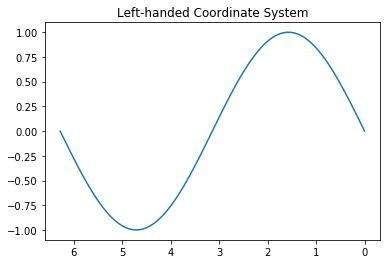

In [21]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.close("all")
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("Left-handed Coordinate System")

ax.invert_xaxis()
plt.show()

### 极坐标系：subplot_kw 参数

极坐标系的绘制只需向 `plt.subplots` 命令传递一个 `subplot_kw` 参数：

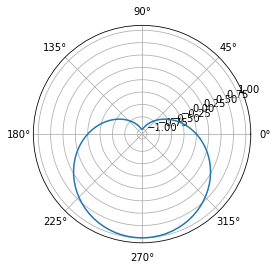

In [25]:
x = np.linspace(0, 2 * np.pi, 100)
y = -np.sin(x)

# 或者传入：dict(polar=True)
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.plot(x, y)

plt.show()

其他可以参考[官方文档 Polar Axes](https://matplotlib.org/3.1.1/api/projections_api.html?highlight=set_rticks#matplotlib.projections.polar.PolarAxes.set_rlabel_position)，这里介绍几个可能用到的：

- 角度（xaxis）
  - `set_thetalim/set_thetamax/set_thetamin`：设置角度范围。
  - `set_theta_direction`：设置角旋转方式。1 （或 `clockwise`）是逆时针，-1 （或 `counterclockwise`）是顺时针。
  - `set_theta_zero_location`：设置零角度的位置，参数 `loc='N'` 表示在正上方、`offset=` 表示相对于 `loc` 的逆时针角度值。
- 半径（yaxis）
  - `set_rlabel_position`：设置半径标签的位置，传入角度值。
  - `set_rlim/set_rmax/set_rmin`：设置半径范围。
  - `set_rticks`：设置半径标签。

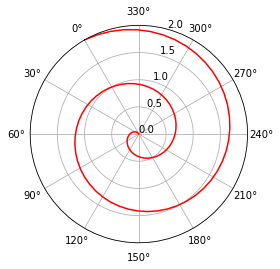

In [60]:
r = np.linspace(0, 2, 100)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.plot(theta, r, 'red')

ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
ax.set_theta_zero_location(loc='N', offset=30)

ax.set_rmax(2)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_rlabel_position(-45)

plt.show()